In [40]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [42]:
# Read from file, this file should contain sentences in evey new line.
fh = open('source.txt')
lines=fh.readlines()
fh.close()

In [43]:
sentences = []
for ln in lines:
    words = word_tokenize(ln)
    sentences.append(words)

In [44]:
model = Word2Vec(sentences,min_count=1)

In [45]:
from sklearn.manifold import TSNE

In [46]:
vocab = list(model.wv.vocab)

In [47]:
X=model[vocab]

In [48]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [49]:
X_tsne.shape

(958, 2)

In [50]:
X.shape

(958, 100)

In [51]:
import pandas as pd

In [52]:
df = pd.concat([pd.DataFrame(X_tsne),pd.Series(vocab)],axis=1)
df.columns = ['x','y','word']

In [53]:
df.head()

,x,y,word
0,2.300065,-12.899397,restriction
1,5.389970,-0.203810,types
2,7.513468,12.594806,two
3,-1.007384,9.931862,inheritance
4,-0.256447,-6.607483,qs3


In [54]:
import matplotlib.pyplot as plt

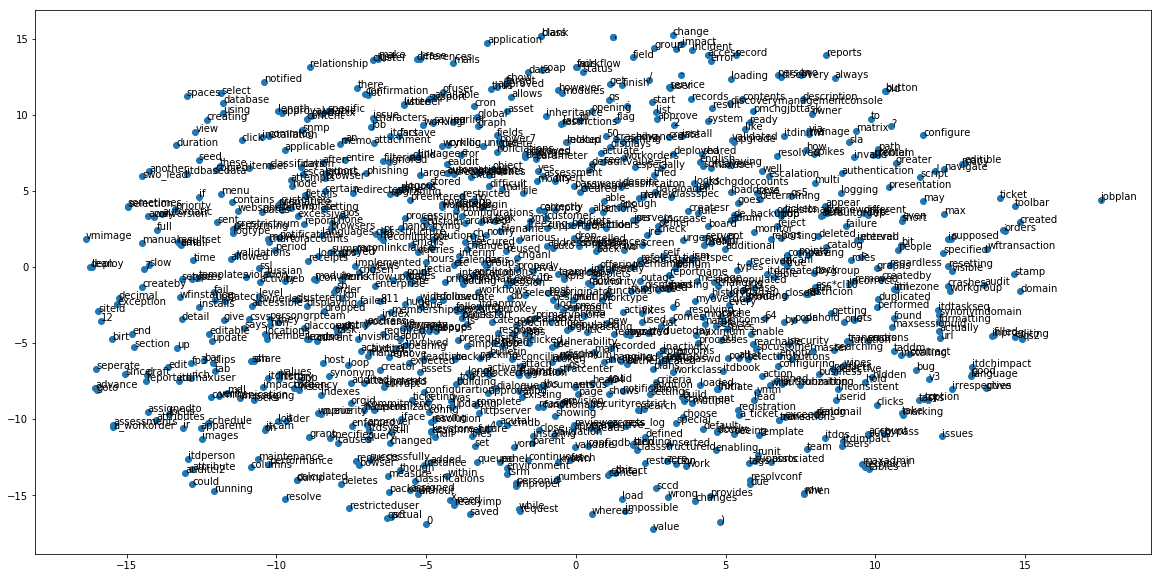

In [55]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['x'],df['y'])
for i,txt in enumerate(df['word']):
    ax.annotate(txt,(df['x'].iloc[i],df['y'].iloc[i]))

In [34]:
%matplotlib inline

In [39]:
fig.savefig('words_distribution.png')

In [73]:
# Lets now try to make sentence distribution for each sentence in each class
vec_sentences = []
str_sentences = []
for sent in sentences:
    sum_x=0
    sum_y=0
    for wrd in sent:
        #print(df[df['word'] == wrd].x)
        sum_x = sum_x + df[df['word'] == wrd].x.values[0]
        sum_y = sum_y + df[df['word'] == wrd].y.values[0]
    vec_sentences.append((sum_x,sum_y))
    str_sentences.append(" ".join(sent))

In [75]:
df2 = pd.concat([pd.DataFrame(vec_sentences),pd.DataFrame(str_sentences)],axis=1)
df2.columns=['x','y','sentences']
df2.head()

,x,y,sentences
0,30.220518,28.092254,"when actual finish populated , setting ticket ..."
1,-35.930112,23.149341,tickets save workflows needs update . remove c...
2,-2.094458,21.340509,multiple change records wonum share approver r...
3,48.719595,38.683802,can close problem record flag - is known error...
4,-13.138637,61.979960,status change tickets content changed fields a...


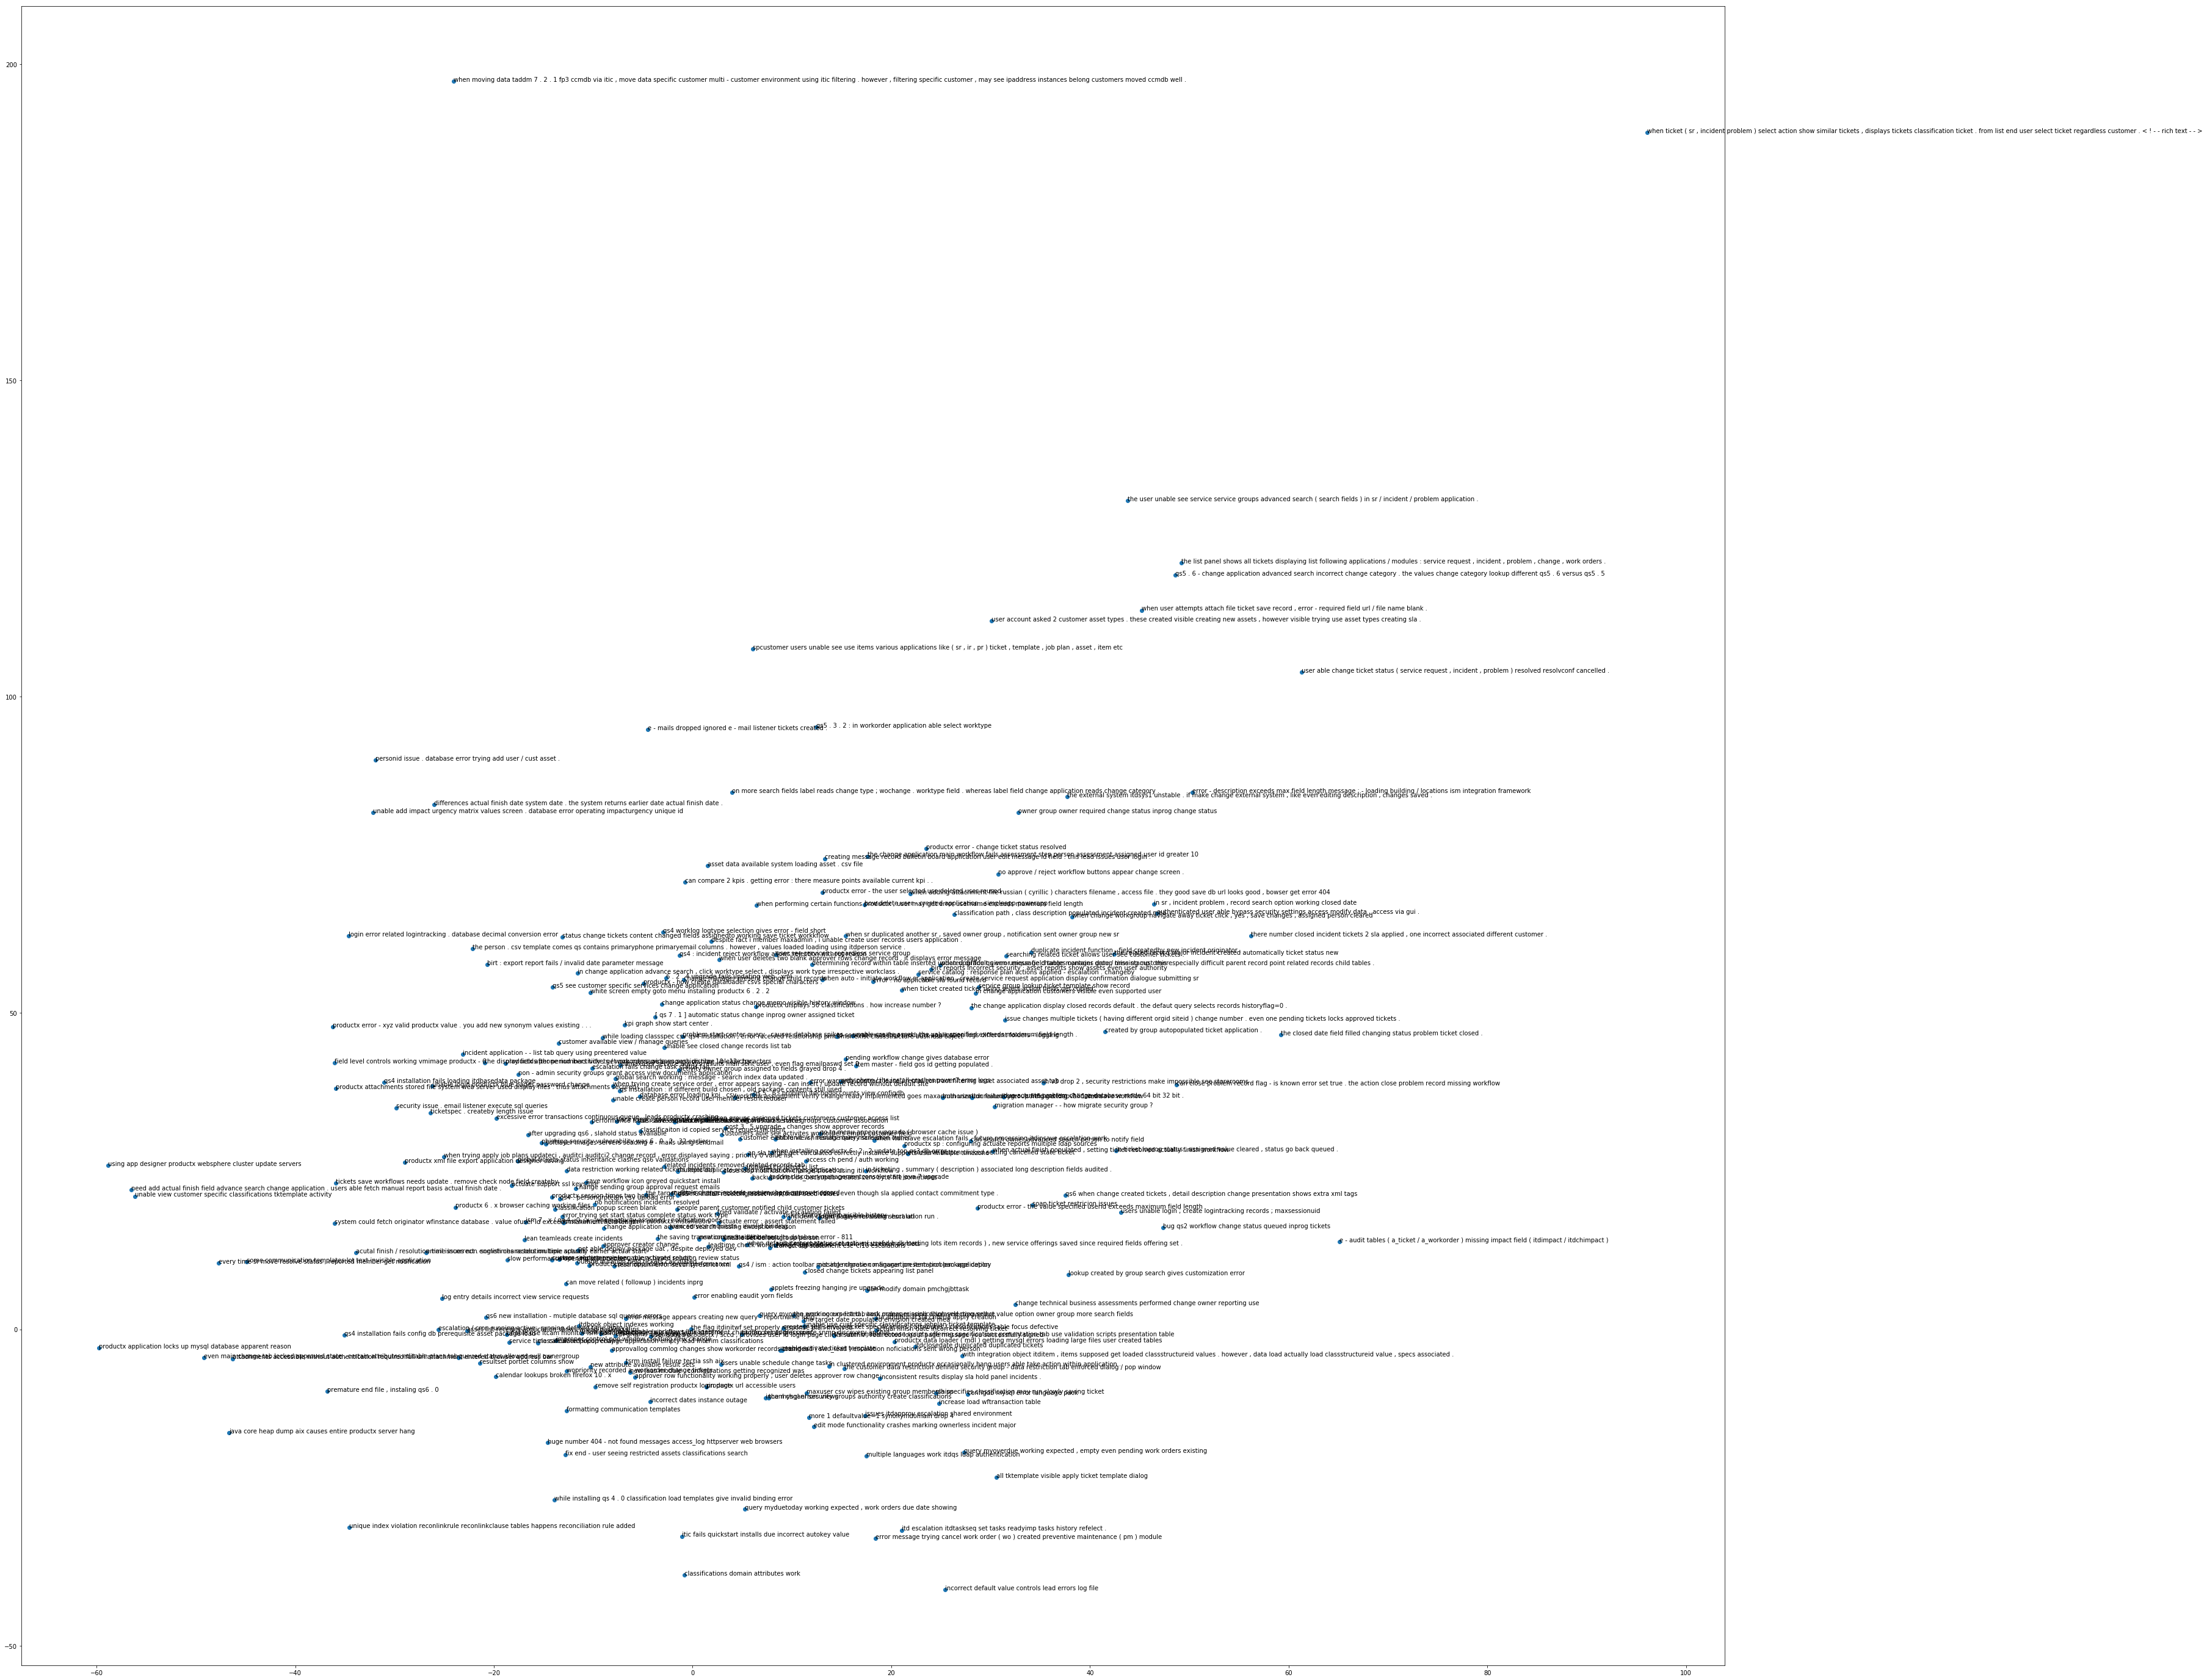

In [77]:
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(1,1,1)
ax.scatter(df2['x'],df2['y'])
for i,txt in enumerate(df2['sentences']):
    ax.annotate(txt,(df2['x'].iloc[i],df2['y'].iloc[i]))

In [79]:
from collections import Counter

In [92]:
word_count = Counter()

In [93]:
for sent in sentences:
    for wrd in sent:
        word_count[wrd] += 1

In [95]:
word_count['when']

19

In [96]:
word_count.most_common()

[('.', 147),
 (',', 78),
 ('change', 54),
 ('error', 44),
 ('-', 43),
 ('application', 32),
 ('user', 31),
 ('productx', 30),
 ('ticket', 28),
 ('/', 27),
 ('the', 24),
 ('status', 23),
 ('tickets', 22),
 ('field', 22),
 ('when', 19),
 ('service', 19),
 ('incident', 18),
 ('customer', 18),
 (':', 18),
 ('unable', 17),
 ('(', 16),
 (')', 16),
 ('record', 15),
 ('search', 15),
 ('asset', 14),
 ('group', 14),
 ('records', 14),
 ('problem', 13),
 ('2', 12),
 ('work', 12),
 ('sr', 12),
 ('working', 12),
 ('list', 12),
 ('date', 12),
 ('created', 12),
 ('new', 12),
 ('workflow', 12),
 ('message', 11),
 ('escalation', 11),
 ('value', 11),
 ('database', 11),
 ('data', 10),
 ('6', 10),
 ('incorrect', 10),
 ('owner', 10),
 ('tab', 10),
 ('fields', 10),
 ('file', 10),
 ('see', 10),
 ('able', 10),
 ('query', 9),
 ('save', 9),
 ('fails', 9),
 ('security', 9),
 ('related', 9),
 ('create', 9),
 ('in', 9),
 ('sla', 9),
 ('closed', 9),
 ('set', 9),
 ('qs', 8),
 ('finish', 8),
 ('person', 8),
 ('using',